In [1]:
import batman
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib widget

In [3]:
params = batman.TransitParams()
params.t0 = 0.                       #time of inferior conjunction
params.per = 1.                      #orbital period
params.rp = 0.1                      #planet radius (in units of stellar radii)
params.a = 15.                       #semi-major axis (in units of stellar radii)
params.inc = 87.                     #orbital inclination (in degrees)
params.ecc = 0.                      #eccentricity
params.w = 90.                       #longitude of periastron (in degrees)
params.u = [0.1, 0.3]                #limb darkening coefficients [u1, u2]
params.limb_dark = "quadratic"       #limb darkening model

In [18]:
t = np.arange(-0.02000, 0.02000, 0.00001)
print(len(t))

4000


In [19]:
from time import time

Elapsed time:  0.0005967617034912109
Elapsed time:  0.00024580955505371094


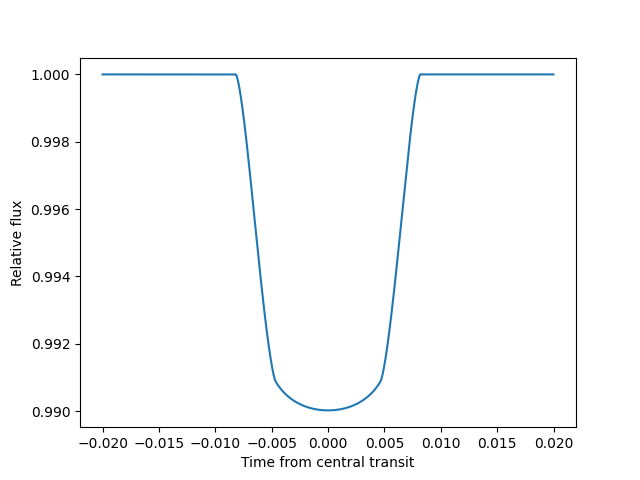

In [52]:

time0 = time()
m = batman.TransitModel(params, t)    #initializes model
flux = m.light_curve(params)          #calculates light curve
time1= time()
print('Elapsed time: ', time1-time0)
delta_t = time1-time0


time0 = time()
flux = m.light_curve(params)          #calculates light curve
time1= time()
print('Elapsed time: ', time1-time0)




plt.figure()
plt.plot(t, flux)
plt.xlabel("Time from central transit")
plt.ylabel("Relative flux")
plt.show()




In [36]:
t_long = np.arange(-0.45000, 0.45000, 0.00001)
print(len(t_long))

90000


Elapsed time:  0.01582646369934082
Elapsed time:  0.0008563995361328125


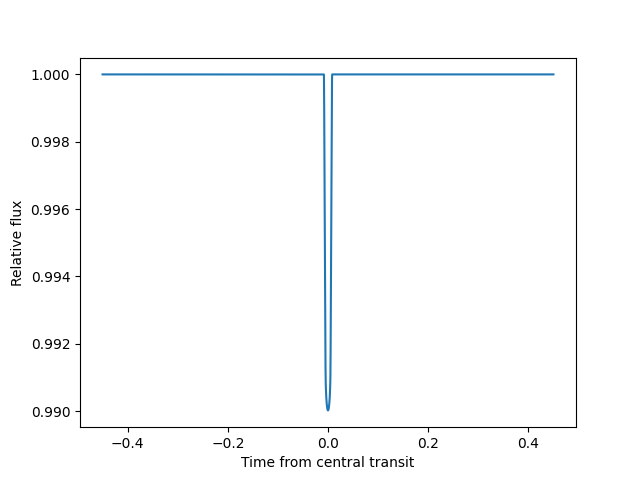

In [54]:
time0 = time()
m_long = batman.TransitModel(params, t_long)    #initializes model
flux_long = m_long.light_curve(params)          #calculates light curve
time1= time()
print('Elapsed time: ', time1-time0)
delta_tlong = time1-time0

time0 = time()
flux_long = m_long.light_curve(params)          #calculates light curve
time1= time()
print('Elapsed time: ', time1-time0)



plt.figure()
plt.plot(t_long, flux_long)
plt.xlabel("Time from central transit")
plt.ylabel("Relative flux")
plt.show()

In [38]:
print(delta_tlong/delta_t)

9.458837075417387


Elapsed time:  0.025236845016479492
Elapsed time:  0.00037407875061035156


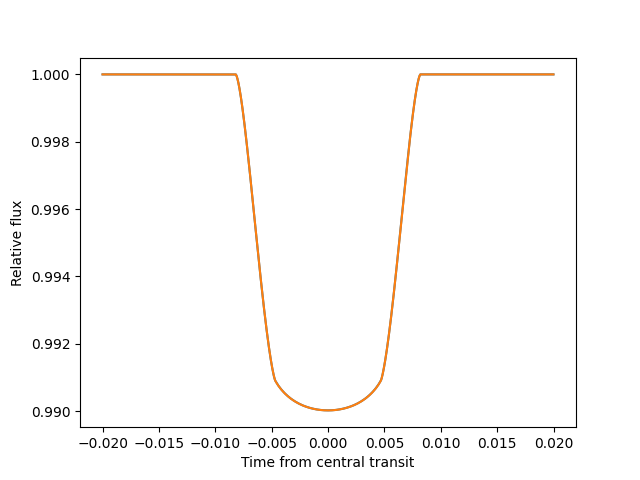

In [56]:
from pytransit import RoadRunnerModel

time0 = time()
tm = RoadRunnerModel('quadratic')
tm.set_data(t)
lc = tm.evaluate(k=0.1, ldc=[0.1, 0.3], t0=0.0, p=1.0, a=15.0, i=87*np.pi/180.)
time1 = time()
print('Elapsed time: ', time1-time0)

delta_t_pytransit = time1-time0

time0 = time()
lc = tm.evaluate(k=0.1, ldc=[0.1, 0.3], t0=0.0, p=1.0, a=15.0, i=87*np.pi/180.)
time1 = time()
print('Elapsed time: ', time1-time0)

plt.figure()
plt.plot(t, lc)
plt.plot(t, flux)
plt.xlabel("Time from central transit")
plt.ylabel("Relative flux")
plt.show()

Elapsed time:  0.03410649299621582
Elapsed time:  0.0007817745208740234


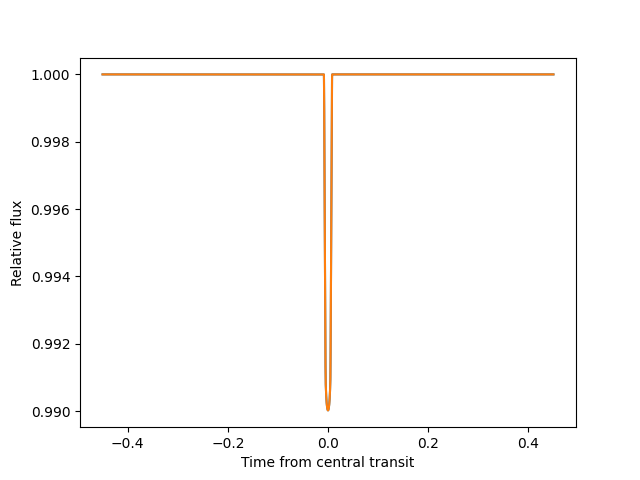

In [60]:
from pytransit import RoadRunnerModel

time0 = time()
tm = RoadRunnerModel('quadratic')
tm.set_data(t_long)
lc_long = tm.evaluate(k=0.1, ldc=[0.1, 0.3], t0=0.0, p=1.0, a=15.0, i=87*np.pi/180.)
time1 = time()
print('Elapsed time: ', time1-time0)

delta_tlong_pytransit = time1-time0

time0 = time()
lc_long = tm.evaluate(k=0.1, ldc=[0.1, 0.3], t0=0.0, p=1.0, a=15.0, i=87*np.pi/180.)
time1 = time()
print('Elapsed time: ', time1-time0)

plt.figure()
plt.plot(t_long, lc_long)
plt.plot(t_long, flux_long)
plt.xlabel("Time from central transit")
plt.ylabel("Relative flux")
plt.show()